# Nilearn Tutorial 6
multi-subject classification. For haxby dataset (n_subject=6)

In [1]:
%matplotlib inline 
import seaborn
import nibabel as nib
import nilearn
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## Loading all bold data
haxby_1 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj1/bold.nii')
haxby_2 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj2/bold.nii')
haxby_3 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj3/bold.nii')
haxby_4 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj4/bold.nii')
haxby_5 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj5/bold.nii')
haxby_6 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj6/bold.nii')

In [5]:
## Loading all mask data
haxby_maskvt1= nib.load('/home/farahana/Documents/dataset/Haxby2001/subj1/mask4_vt.nii')
haxby_maskvt2= nib.load('/home/farahana/Documents/dataset/Haxby2001/subj2/mask4_vt.nii')
haxby_maskvt3= nib.load('/home/farahana/Documents/dataset/Haxby2001/subj3/mask4_vt.nii')
haxby_maskvt4= nib.load('/home/farahana/Documents/dataset/Haxby2001/subj4/mask4_vt.nii')
haxby_maskvt5= nib.load('/home/farahana/Documents/dataset/Haxby2001/subj5/mask4_vt.nii')
haxby_maskvt6= nib.load('/home/farahana/Documents/dataset/Haxby2001/subj6/mask4_vt.nii')

In [67]:
## Loading all label data
haxby_label_1 = np.genfromtxt('/home/farahana/Documents/dataset/Haxby2001/subj1/labels.txt', delimiter=' ', skip_header=1, dtype=None, usecols=0)
haxby_label_2 = np.genfromtxt('/home/farahana/Documents/dataset/Haxby2001/subj2/labels.txt', delimiter=' ', skip_header=1, dtype=None, usecols=0)
haxby_label_3 = np.genfromtxt('/home/farahana/Documents/dataset/Haxby2001/subj3/labels.txt', delimiter=' ', skip_header=1, dtype=None, usecols=0)
haxby_label_4 = np.genfromtxt('/home/farahana/Documents/dataset/Haxby2001/subj4/labels.txt', delimiter=' ', skip_header=1, dtype=None, usecols=0)
haxby_label_5 = np.genfromtxt('/home/farahana/Documents/dataset/Haxby2001/subj5/labels.txt', delimiter=' ', skip_header=1, dtype=None, usecols=0)
haxby_label_6 = np.genfromtxt('/home/farahana/Documents/dataset/Haxby2001/subj6/labels.txt', delimiter=' ', skip_header=1, dtype=None, usecols=0)
haxby_label = np.append(haxby_label_1,haxby_label_2)
haxby_label = np.append(haxby_label, haxby_label_3)
haxby_label = np.append(haxby_label, haxby_label_4)
haxby_label = np.append(haxby_label, haxby_label_5)
haxby_label = np.append(haxby_label, haxby_label_6)

haxby_label.shape

(8712,)

In [23]:
from nilearn.input_data import NiftiMasker
haxby_masker1 = NiftiMasker(haxby_maskvt1)
haxby_masker2 = NiftiMasker(haxby_maskvt2)
haxby_masker3 = NiftiMasker(haxby_maskvt3)
haxby_masker4 = NiftiMasker(haxby_maskvt4)
haxby_masker5 = NiftiMasker(haxby_maskvt5)
haxby_masker6 = NiftiMasker(haxby_maskvt6)

In [32]:
haxby_fmri1 = haxby_masker1.fit_transform(haxby_1)
haxby_fmri2 = haxby_masker2.fit_transform(haxby_2)
haxby_fmri3 = haxby_masker3.fit_transform(haxby_3)
haxby_fmri4 = haxby_masker4.fit_transform(haxby_4)
haxby_fmri5 = haxby_masker5.fit_transform(haxby_5)
haxby_fmri6 = haxby_masker6.fit_transform(haxby_6)

In [66]:
haxby_fmri = np.r_['-1', haxby_fmri1, haxby_fmri2]
haxby_fmri = np.r_['-1', haxby_fmri, haxby_fmri3]
haxby_fmri = np.r_['-1', haxby_fmri, haxby_fmri4]
haxby_fmri = np.r_['-1', haxby_fmri, haxby_fmri5]
haxby_fmri = np.r_['-1', haxby_fmri, haxby_fmri6]

haxby_fmri.shape

(1452, 2793)

### Cross Validation all the subjects

In [57]:
### cross validation
from sklearn.cross_validation import cross_val_score, KFold

In [58]:
cv = KFold(n=len(haxby_fmri), n_folds=10, shuffle=True, random_state=10)

### Train and test split

In [69]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(haxby_fmri, haxby_label_1, random_state=30)

## Building the classifier

## 1. SVC

In [70]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')

In [71]:
svc1 = svc_classifier.fit(haxby_fmri, haxby_label_1)
cv_score_svc = cross_val_score(svc1, haxby_fmri, haxby_label_1, cv=cv)
print (np.mean(cv_score_svc))

0.942177609825


In [72]:
svc2 = svc_classifier.fit(X_train, y_train)
ts_score_svc = svc2.score(X_test, y_test)
print(ts_score_svc)

0.914600550964


## 2. Naive Bayes

In [73]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()

In [74]:
gnb1 = gnb_classifier.fit(haxby_fmri, haxby_label_1)
cv_score_gnb = cross_val_score(gnb1, haxby_fmri, haxby_label_1, cv=cv)
print (np.mean(cv_score_gnb))

0.594260746339


In [75]:
gnb2 = gnb_classifier.fit(X_train, y_train)
ts_score_gnb = gnb2.score(X_test, y_test)
print(ts_score_gnb)

0.556473829201


In [76]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_classifier = MultinomialNB()

In [77]:
mnb1 = mnb_classifier.fit(haxby_fmri, haxby_label_1)
cv_score_mnb = cross_val_score(mnb1, haxby_fmri, haxby_label_1, cv=cv)
print (np.mean(cv_score_mnb))

0.398682097308


In [78]:
mnb2 = mnb_classifier.fit(X_train, y_train)
ts_score_mnb = mnb2.score(X_test, y_test)
print(ts_score_mnb)

0.29476584022


## 3. KNN

In [79]:
# K-nearest neighbors (k=5)
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

In [80]:
knn1 = knn_classifier.fit(haxby_fmri, haxby_label_1)
cv_score_knn = cross_val_score(knn1, haxby_fmri, haxby_label_1, cv=cv)
print (np.mean(cv_score_knn))

0.876022673595


In [81]:
knn2 = knn_classifier.fit(X_train, y_train)
ts_score_knn = knn2.score(X_test, y_test)
print(ts_score_knn)

0.853994490358


## 4. Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

In [83]:
dt1 = dt_classifier.fit(haxby_fmri, haxby_label_1)
cv_score_dt = cross_val_score(dt1, haxby_fmri, haxby_label_1, cv=cv)
print (np.mean(cv_score_dt))

0.586046291923


In [84]:
dt2 = dt_classifier.fit(X_train, y_train)
ts_score_dt = dt2.score(X_test, y_test)
print(ts_score_dt)

0.548209366391


## 5. Esemble Method

In [85]:
# Bagging meta-estimator
from sklearn.ensemble import BaggingClassifier
bag_classifier = BaggingClassifier(knn_classifier)

In [86]:
bag1 = bag_classifier.fit(haxby_fmri, haxby_label_1)
cv_score_bag = cross_val_score(bag1, haxby_fmri, haxby_label_1, cv=cv)
print (np.mean(cv_score_bag))

0.881521020312


In [87]:
bag2 = bag_classifier.fit(X_train, y_train)
ts_score_bag = bag2.score(X_test, y_test)
print(ts_score_bag)

0.840220385675


### Plotting

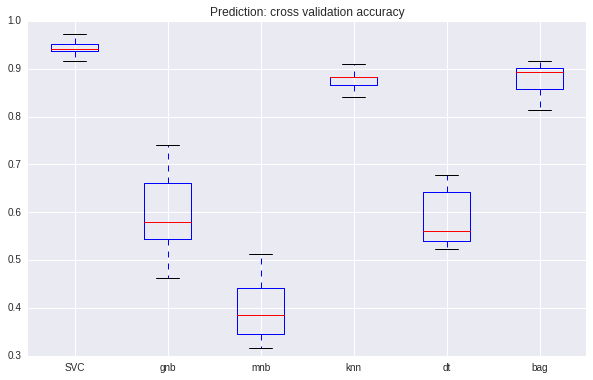

In [92]:
plt.figure(figsize=(10, 6))
plt.boxplot([cv_score_svc, cv_score_gnb, cv_score_mnb, cv_score_knn, cv_score_dt, cv_score_bag])
plt.xticks([1,2,3,4,5,6], ['SVC', 'gnb', 'mnb', 'knn', 'dt', 'bag'])
plt.title('Prediction: cross validation accuracy')